### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
cancer=load_breast_cancer()
cancer_df=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
cancer_df['target']=cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
cancer_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

### Data Understanding

In [4]:
cancer_df.shape

(569, 31)

In [5]:
cancer_df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [6]:
cancer_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### Model Building

In [7]:
X=cancer_df.drop('target',axis=1)
y=cancer_df[['target']]

In [8]:
X.shape,y.shape

((569, 30), (569, 1))

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12,shuffle=True,stratify=y)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455, 1), (114, 1))

In [11]:
dt_classifier=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=True)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=True)

### Model Testing

In [12]:
y_pred_dt_test=dt_classifier.predict(X_test)
y_pred_dt_train=dt_classifier.predict(X_train)

In [13]:
print(accuracy_score(y_test,y_pred_dt_test))

0.9035087719298246


In [14]:
print(accuracy_score(y_train,y_pred_dt_train))

0.9846153846153847


### Build Tree

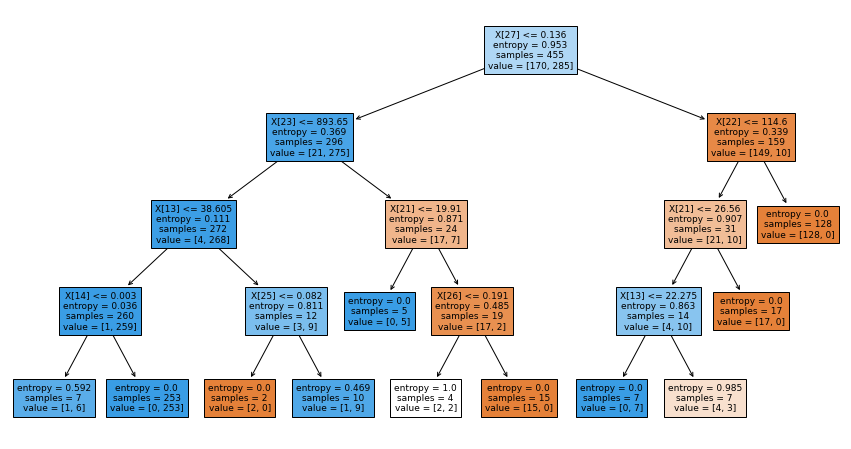

In [15]:
plt.figure(figsize=(15,8))
plot_tree(decision_tree=dt_classifier,filled=True,fontsize=9)
plt.show()

## Applying PCA

### Data Preprocessing

In [16]:
minmax=MinMaxScaler()
scaled_X=minmax.fit_transform(X)
scaled_X_df = pd.DataFrame(scaled_X,columns=cancer.feature_names)
scaled_X_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [17]:
pca=PCA(n_components=2)
pca_components=pca.fit_transform(scaled_X_df)
pca_components_df=pd.DataFrame(pca_components,columns=['PCA1','PCA2'])
pca_components_df

,PCA1,PCA2
0,1.387021,0.426895
1,0.462308,-0.556947
2,0.954621,-0.109701
3,1.000816,1.525089
4,0.626828,-0.302471
...,...,...
564,1.002840,-0.474785
565,0.620757,-0.517200
566,0.226311,-0.287946
567,1.677834,0.335946


In [18]:
pca.n_components_

2

In [19]:
pca.explained_variance_

array([0.33133389, 0.10785038])

In [20]:
X_train,X_test,y_train,y_test=train_test_split(pca_components_df,y,test_size=0.2,random_state=12,shuffle=True,stratify=y)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 2), (114, 2), (455, 1), (114, 1))

In [22]:
dt_classifier=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=True)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=True)

### Model Testing

In [23]:
y_pred_dt_test=dt_classifier.predict(X_test)
y_pred_dt_train=dt_classifier.predict(X_train)

In [24]:
print(accuracy_score(y_test,y_pred_dt_test))

0.9035087719298246


In [25]:
print(accuracy_score(y_train,y_pred_dt_train))

0.9692307692307692


### Let's Visualize

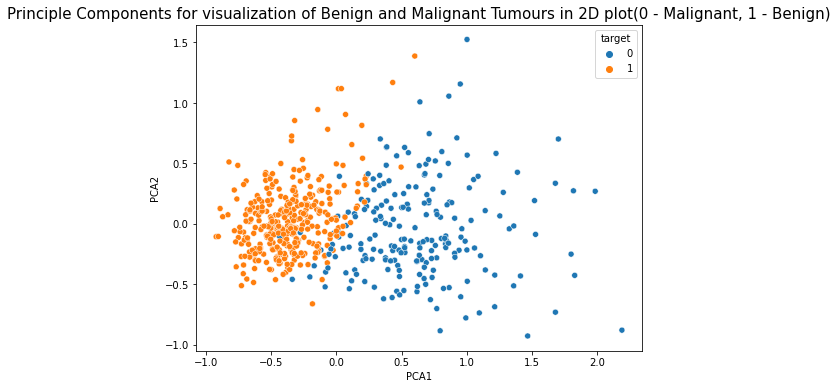

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components_df['PCA1'],y=pca_components_df['PCA2'],hue=cancer_df['target'])
plt.title('Principle Components for visualization of Benign and Malignant Tumours in 2D plot(0 - Malignant, 1 - Benign)',size=15)
plt.show()

### End